![logo](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b386/5bbd3d87-fd8f-432d-877e-7e9fcdcdb57b/file.png)


OpenCV (Open source computer vision) is an open source dedicated computer vision and machine learning software library. It aims to provide image and video analysis functionalities to build applications related to the field of computer vision. It includes a comprehensive set of both classic and state-of-the-art computer vison and machine learning algorithm implementations.Over the years with the help of OpenCV computers are now able to perform tasks such as detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene and a lot more.


There are interfaces build around for OpenCV functionality usage. Officially OpenCV has released two types of Python interfaces, `cv` and `cv2`. Later on the development of `cv` was kept on halt. Now with the latest release `cv2` module has a subclass of `cv` inside it which can be accessed.

While dealing with package `cv2` everything is returned as NumPy objects like ndarray and native Python objects like lists,tuples,dictionary, etc. So due to this NumPy support, you can do any numpy operation here. NumPy is a highly stable and fast array processing library.




## Pixel Representation

A digital image is nothing more than data—numbers indicating variations of red, green, and blue at a particular location on a grid of pixels. Most of the time, we view these pixels as miniature rectangles sandwiched together on a computer screen.

In general there are two ways to represent the pixels : grayscale and color. 

In Grayscale pixel representation the pixel has a value ranging from 0 to 255. Where zero represents the color `black` and 255  represents for color `white` and all the values that lies between 0 and 255 are representing varying shades of gray. 



In colored pixel representation each pixel is represented in RGB color space - one value for the Red component, one for Green and one for Blue. Every component has a value ranging from 0 to 255 which indicates the strenght of that color there is.When combined these values into an RGB tuple in the form (red, green, blue). This tuple represents our color.

![RGB](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b843/cbc5f89d-4524-4e20-a1b0-8c55edaa2296/file.png)



OpenCV allows you to access every single pixel value which is nothing but a numpy array value. 

**Note that OpenCV stores RGB channels in reverse order that is it would be stored in BGR order.**

It's time to access the pixels and manipulate them.

```python
# accessing pixels at coordinate (0,0)
(b, g, r) = img[0, 0]
print('Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}'.format(r, g, b)) #print out the values of that location

# manipulating the pixel at (0,0) 
img[0,0] = (0, 0 , 255) #setting the color to be pure red as red has the value 255
(b, g, r) = img[0, 0]
print('Pixel at (0, 0) - Red : {}, Green: {}, Blue: {}'.format(r, g, b)) #print out the modified values of that location

Output of orginal pixel values: Pixel at (0, 0) - Red: 44, Green: 43, Blue: 39
Output of modified pixel values : Pixel at (0, 0) - Red : 255, Green: 0, Blue: 0

```


This is just one pixel value that is manipulated if we want to modify an entire region of several pixel values we can just select that region and apply these changes similarily as follows -

```python
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting BGR to RGB format
RGB_img[0:100, 0:100] = (0, 255, 0)#selecting 100 * 100 region from the image and then assigning the green color to it
plt.imshow(RGB_img)
```
Output : 
![pixel_manipulate_messi](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b996/ac01646c-a4cb-46fc-8dd9-22acd021d661/file.png)




We have used `cv2.cvtColor` functionality of OpenCV that essentially converts image from one color space to another. Since the default color format in OpenCV is interpreted in RGB but it is actually BGR (as the OpenCV librarty has been built with fixing BGR format as the basic format to interpret image) .Hence we use `cv2.COLOR_BGR2RGB` which changes the color space from BGR to RGB.



In [1]:
import numpy as np # linear algebra
# !pip install opencv-python     #uncomment and run the line to install OpenCV library
import cv2

import matplotlib.pyplot as plt

## Reading an Image

In [2]:
# reading the image
im = cv2.imread('../data/building.jpg',0)
# displaying the image
cv2.imshow('image',im)
# waiting for 5 seconds
cv2.waitKey(5000)
# destroying the window after 5 seconds
cv2.destroyAllWindows()


Image processing techniques helps in the providing a better manipulation of visual data by using computers. Raw visual data obtained from various sources contains deficiencies.In order to make this data more interpretable these techniques come handy.

The purpose of image processing is divided majorly into 5 groups -

    Visualization - Observe the objects that are not visible
    Image sharpening and restoration - To create a better image
    Image retrieval - Seek for the image of interest
    Measurement of pattern - Measures various objects in image
    Image recognition - Distinguish the objects in an image.

Let's start of with learning some of these techniques hands-on


## Translations

Translation of an image is a technique involving shifting of an image along the x and y axis. With the help of this technique we can shift an image up, down, left or right, along with any combination of the above.

This an affine transform that simply shifts the position of an image.

We use cv2.warpAffine to implement these transformations.

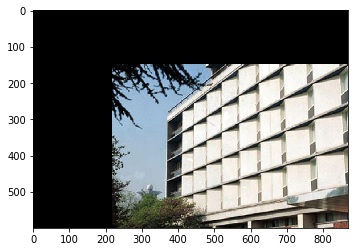

In [3]:
image = cv2.imread('../data/building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Store height and width of the image
height, width = image.shape[:2]

quarter_height, quarter_width = height/4, width/4

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
plt.imshow(img_translation)

## Rotations

This technique involves rotating an image by some angle $\theta$. Rotation is useful for scenarios to provide variation to existing data thereby making machine learning models more robust to the data variation. Also this rotation can be applied in the pre-processing stage while building a computer vision application to make sure that the data is consistent in terms of $\theta$.

Let's explore how we can rotate an image with the help of OpenCV.



cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)

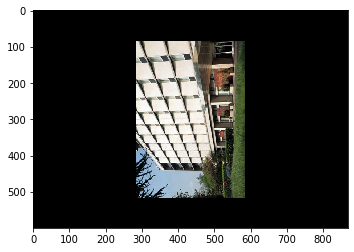

In [4]:
image = cv2.imread('../data/building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.imshow( rotated_image)

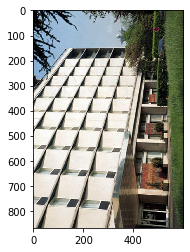

In [5]:
rotated_image = cv2.transpose(image)

plt.imshow( rotated_image)


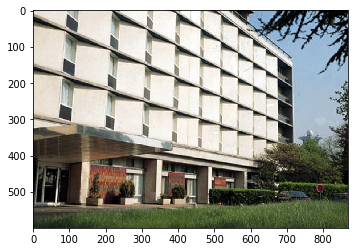

In [6]:
flipped = cv2.flip(image, 1)
plt.imshow( flipped) 

## Resizing

`Resizing` or scaling as we call it is a technique to increase or reduce the size of an image. Web browsers, image editors, image and file viewers are among the various applications of image scaling or resizing is being applied.

Let's now look at how can we perform it on the image.

Re-sizing is very easy using the cv2.resize function, it's arguments are:
```python
cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)
```

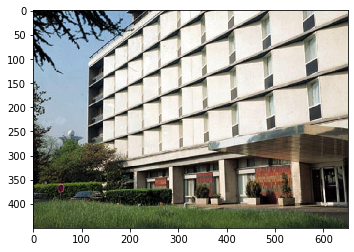

In [7]:
# load our input image
image = cv2.imread('../data/building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.imshow(image_scaled)

### Arithmetic Operations

Image Arithmetic comprise of several techniques to perform basic airthmetic operations such as additon, subtraction, multiplication and divison on images. This technique has many use cases in image processing both as a prelimnary step in more complex operation and by itself. For example, image subtraction can be used to detect the differences between two or more images of the same scence or object.

Following code snippets will be guiding you through different image arithmetic operations.We will start off with introducing what happens if we add or subtract two or more images using OpenCV.
Image Addition and Subtraction

Before jumping straight to the additon or subtraction of images directly let's discuss what happens if we are examining a pixel of value 251 and we try to add 12 to it.If we proceed by the approach of basic arithmetic rules we would end up adding having a total value of 263 but since RGB images are represented as 8-bit unsigned integers 263 is not a valid value same goes in the case of subtraction a value resulting from the basic subtraction attaining a negative pixel values is not valid when it comes to RGB images.

There are two ways to handle the situation posed above:

   * We can perform a check to ensure that no pixel falls outside the range of [0,255], thus clipping all pixels to have a minimum and maximum value of 0 and 255 respectively.

   * Or we can apply a modulus operation and wrap around the values.

Now you can go on implementing any of these two ways mentioned above depending upon how you want the desired results to be. But keep in mind that OpenCV will by default perform clipping and ensure that pixel values do not fall outside the range [0, 255] and using numpy will perform modulo airthmetic and 'wrap around'.

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.



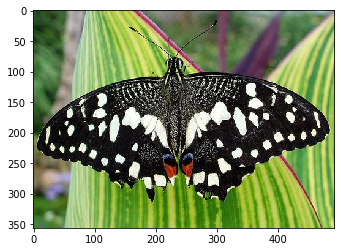

In [8]:
image = cv2.imread('../data/butterfly.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.imread('/kaggle/input/opencv-samples-images/someshapes.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 175 
plt.imshow(image)

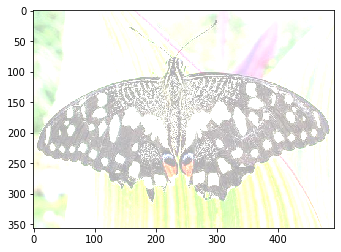

In [9]:
# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
plt.imshow(added)

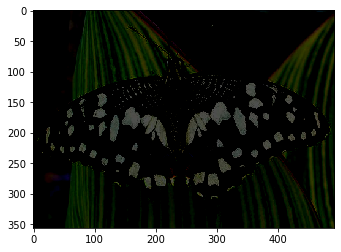

In [10]:
# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
plt.imshow( subtracted)


## Blurring

Image Blurring refers to making the image less clear or distinct. It is done with the help of various low pass filter kernels.

Advantages of blurring:

   * It helps in Noise removal. As noise is considered as high pass signal so by the application of low pass filter kernel we restrict noise.
   * It helps in smoothing the image.
   * Low intensity edges are removed.
   * It helps in hiding the details when necessary. For e.g. in many cases police deliberately want to hide the face of the victim, in such cases blurring is required.

Important types of blurring:

    Gaussian Blurring:Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models.
    E.g. of a Gaussian kernel(3×3)

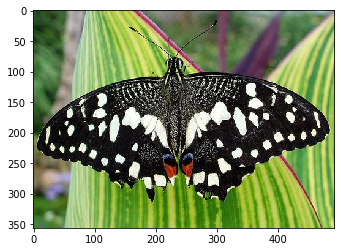

In [11]:
image = cv2.imread('../data/butterfly.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9


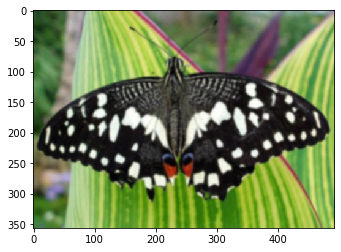

In [12]:
# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (7,7), 0)
plt.imshow(Gaussian)

## Face and Smile Detection

### Step 1: Include the desired haar-cascades.

Haar-cascades are classifiers that are used to detect features (of face in this case) by superimposing predefined patterns over face segments and are used as XML files. In our model, we shall use face, eye and smile haar-cascades, which after downloading need to be placed in the working directory.



In [13]:
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('../data/haarcascade_eye.xml') 
smile_cascade = cv2.CascadeClassifier('../data/haarcascade_smile.xml') 


## Step 2:  In this step, we are going to build main function which would be performing the smile detection.

* The live feed coming from the webcam/video device is processed frame by frame. We process the gray scale image, as haar-cascades work better on them.
* To detect the face, we use:
```python
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
```
where 1.3 is the scaling factor, and 5 is the number of nearest neighbors. We can adjust these factors as per our convenience/results to improve our detector.

Now for each subsequent face detected, we need to check for smiles.

In [14]:
def detect(gray, frame): 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    for (x, y, w, h) in faces: 
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) 
        roi_gray = gray[y:y + h, x:x + w] 
        roi_color = frame[y:y + h, x:x + w] 
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20) 
  
        for (sx, sy, sw, sh) in smiles: 
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 
    return frame 

### Explanations –

* The face data is stored as tuples of coordinates. Here, x and y define the coordinate of the upper-left corner of the face frame, w and h define the width and height of the frame.
* The cv2.rectangle function takes in the arguments frame, upper-left coordinates of the face, lower right coordinates, the RGB code for the rectangle (that would contain within it the detected face) and the thickness of the rectangle.
* The roi_gray defines the region of interest of the face and roi_color does the same for the original frame.
* In line 7, we apply smile detection using the cascade.

### Step 3 : 

We define main function in this step. After execution, the function can be terminated by pressing the “q” key.



In [15]:
video_capture = cv2.VideoCapture(0) 
while True: 
   # Captures video_capture frame by frame 
    _, frame = video_capture.read()  
  
    # To capture image in monochrome                     
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
      
    # calls the detect() function     
    canvas = detect(gray, frame)    
  
    # Displays the result on camera feed                      
    cv2.imshow('Video', canvas)  
  
    # The control breaks once q key is pressed                         
    if cv2.waitKey(1) & 0xff == ord('q'):                
        break
  
# Release the capture once all the processing is done. 
video_capture.release()                                  
cv2.destroyAllWindows() 